#1 鸢尾花二特征分类的SVM实现

0.8
训练集准确率： 0.8
0.8
测试集准确率： 0.8
decision_function:
 [[ 2.22976777  0.93523902 -0.16500679]
 [-0.12204492  2.11891317  1.00313176]
 [-0.23499985  1.11410221  2.12089764]
 [ 2.16897433  0.99886921 -0.16784355]
 [ 2.22326299  0.96255343 -0.18581642]
 [-0.23718865  1.07538094  2.16180772]
 [ 2.27755165  0.92623764 -0.20378929]
 [-0.14162089  1.05737818  2.08424271]
 [-0.20679194  1.04356584  2.1632261 ]
 [-0.26977418  1.06847477  2.20129941]
 [-0.07644985  2.07119052  1.00525933]
 [-0.23937746  1.03665967  2.20271779]
 [-0.11772895  1.05287749  2.06485146]
 [ 2.21888538 -0.11488911  0.89600373]
 [-0.23931582  2.18013788  1.05917794]
 [-0.22849507  1.0867878   2.14170727]
 [-0.23718865  1.07538094  2.16180772]
 [ 1.01480194  2.11922344 -0.13402538]
 [-0.1438097   1.01865691  2.12515278]
 [-0.07426104  2.10991179  0.96434926]
 [ 2.1320112  -0.08547949  0.95346829]
 [ 2.16028075  0.98746236 -0.14774311]
 [ 2.24058852 -0.15811106  0.91752255]
 [-0.23937746  1.03665967  2.20271779]
 [ 2.2645420

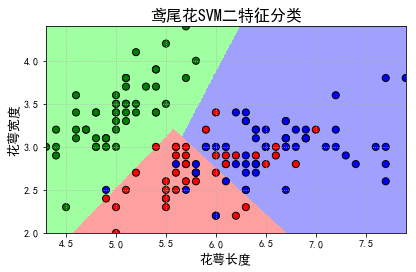

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

data = pd.read_csv('data/iris.data', header=None)
x, y = data[np.arange(4)], data[4]
y = pd.Categorical(y).codes
x = x[[0, 1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)

# 分类器
clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())

# 准确率
print(clf.score(x_train, y_train))  # 精度
print('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print(clf.score(x_test, y_test))
print('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

# decision_function
print('decision_function:\n', clf.decision_function(x_train))
print('\npredict:\n', clf.predict(x_train))

# 画图
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
# print 'grid_test = \n', grid_test
# Z = clf.decision_function(grid_test)    # 样本到决策面的距离
# print Z
grid_hat = clf.predict(grid_test)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()

#2 随机数的SVM算法

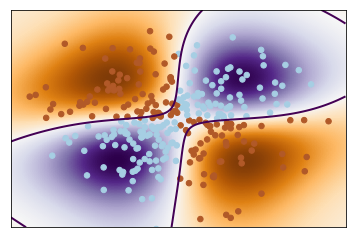

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

#3 SVM的RBF核与过拟合

准确率：100.0%


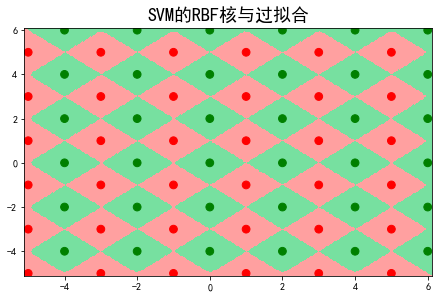

In [5]:
import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

def extend(a, b):
    big, small = 1.01, 0.01
    return big*a-small*b, big*b-small*a

t = np.linspace(-5, 5, 6)
t1, t2 = np.meshgrid(t, t)
x1 = np.stack((t1.ravel(), t2.ravel()), axis=1)
N = len(x1)
x2 = x1 + (1, 1)
x = np.concatenate((x1, x2))
y = np.array([1]*N + [-1]*N)

clf = svm.SVC(C=0.1, kernel='rbf', gamma=5)
clf.fit(x, y)
y_hat = clf.predict(x)
print('准确率：%.1f%%' % (np.mean(y_hat == y) * 100))

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
x1_min, x1_max = extend(x[:, 0].min(), x[:, 0].max())  # 第0列的范围
x2_min, x2_max = extend(x[:, 1].min(), x[:, 1].max())  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:300j, x2_min:x2_max:300j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
grid_hat = clf.predict(grid_test)
grid_hat.shape = x1.shape  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=60, c=y, marker='o', cmap=cm_dark)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'SVM的RBF核与过拟合', fontsize=18)
plt.tight_layout(0.2)
plt.show()

#4 SVM多分类解法

预测正确的样本个数：69，正确率：86.25%
[[ 0.00041835  1.0003916   1.25158694  1.03912429  1.06272462  0.06194409]
 [ 0.73619309  0.99992928  1.00035655  1.01254723  1.0001967  -0.0689392 ]
 [-0.15399317  0.73429473  0.85195011  1.02091686  0.54511927 -0.30394945]
 [ 1.00009974  1.13669234  1.42106961  0.90744317  0.60940832 -0.33678376]
 [ 1.25490693  1.00737616  1.28386426  0.53541648  0.3328939  -0.23111811]
 [ 1.13837756  0.9998946   1.09243513  0.68425394  0.62492466 -0.09376565]
 [ 1.14531542  1.12700656  1.4596147   0.86224637  0.6542139  -0.26387772]
 [ 1.27456468  1.08751578  1.4197428   0.75811727  0.57714971 -0.23383485]
 [ 0.38108911  1.07508655  1.37185691  1.02312927  0.8309466  -0.16605383]
 [ 1.23239766  1.08305017  0.72089554  0.61064721 -0.24941275 -0.81087327]
 [ 0.9999704   0.99997809  1.00016225  0.05183437 -0.03803559 -0.10515298]
 [ 1.00011152  1.09099303  0.99944411  0.83414486  0.10857475 -0.70070868]
 [-0.68417088  0.16098897  0.36409711  0.85982419  0.55342992 -0.12958574]
 

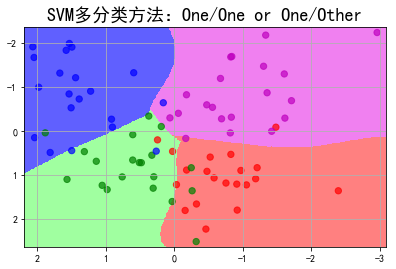

In [6]:
import numpy as np
from sklearn import svm
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt

def extend(a, b, r):
    x = a - b
    m = (a + b) / 2
    return m-r*x/2, m+r*x/2

np.random.seed(0)
N = 20
x = np.empty((4*N, 2))
means = [(-1, 1), (1, 1), (1, -1), (-1, -1)]
sigmas = [np.eye(2), 2*np.eye(2), np.diag((1,2)), np.array(((2,1),(1,2)))]
for i in range(4):
    mn = stats.multivariate_normal(means[i], sigmas[i]*0.3)
    x[i*N:(i+1)*N, :] = mn.rvs(N)
a = np.array((0,1,2,3)).reshape((-1, 1))
y = np.tile(a, N).flatten()
clf = svm.SVC(C=1, kernel='rbf', gamma=1, decision_function_shape='ovo')
# clf = svm.SVC(C=1, kernel='linear', decision_function_shape='ovr')
clf.fit(x, y)
y_hat = clf.predict(x)
acc = accuracy_score(y, y_hat)
np.set_printoptions(suppress=True)
print(u'预测正确的样本个数：%d，正确率：%.2f%%' % (round(acc*4*N), 100*acc))
# decision_function
print(clf.decision_function(x))
print(y_hat)

x1_min, x2_min = np.min(x, axis=0)
x1_max, x2_max = np.max(x, axis=0)
x1_min, x1_max = extend(x1_min, x1_max, 1.05)
x2_min, x2_max = extend(x2_min, x2_max, 1.05)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
x_test = np.stack((x1.flat, x2.flat), axis=1)
y_test = clf.predict(x_test)
y_test = y_test.reshape(x1.shape)
cm_light = mpl.colors.ListedColormap(['#FF8080', '#A0FFA0', '#6060FF', '#F080F0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b', 'm'])
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_test, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=cm_dark, alpha=0.7)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(b=True)
plt.tight_layout(pad=2.5)
plt.title(u'SVM多分类方法：One/One or One/Other', fontsize=18)
plt.show()

#5 SVM不同参数的分类

线性核，C=0.1
支撑向量的数目： [25 25]
支撑向量的系数： [[-0.1        -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.0177785  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1         0.1         0.1         0.1
   0.1         0.1         0.1         0.1         0.1         0.1         0.1
   0.1         0.1         0.1         0.09707388  0.1         0.1         0.1
   0.1         0.02070462  0.1         0.1         0.1         0.1         0.1
   0.1       ]]
支撑向量： [ 0  1  2  4  5  6  8 11 13 15 16 18 20 22 23 25 26 27 28 33 34 35 36 37 41
 51 53 56 60 61 63 64 66 69 71 73 76 77 79 83 84 87 88 89 91 92 95 96 97 99]


clf.decision_function(x) =  [-0.49978093 -0.64260067 -0.16653517 -1.42810858 -0.52358429 -0.8330267
 -0.3093549  -2.54686225 -0.71401032 -1.45191193 -2.3088295  -0.99964979
 -1.71374762 -0.49978093 -1.90417408 -0.85683006 -0.64260067 -1.59473125
 -0.64260067 -1.73755098  0.00008751 -1.42810858 -0.16653517 -0.69020697
 -1.07105945 -0.85683006 -0.38076456  0.14290724 -0.64260067 -2.3088295
 -1.85656736 -2.07079675 -1.64233797  0.1667106  -0.64260067 -0.54738765
 -0.40456792 -0.95204307 -1.3090922  -1.42810858 -1.04725609 -0.61879731
 -1.52332159 -2.54686225 -1.19007583 -1.28528884 -1.19007583 -1.07105945
 -2.80869836 -1.3090922   2.09477512  0.45234965  1.59490668  0.95221851
  1.57110332  2.42802131 -0.45217463  1.78533314  1.19025126  2.2137915
  0.54756267  0.6903824   1.11884118  0.42854629  0.92841473  1.07123446
  0.83320213  2.6422507   2.97549647 -0.04751879  1.54729997  0.30952991
  2.45182467  0.11910388  1.35687393  1.42828401  0.00008751  0.11910388
  1.23785756  0.99982523  

clf.decision_function(x) =  [-0.81816038 -1.00000589 -0.2726992  -2.27275492 -0.81817922 -1.36362156
 -0.45454471 -4.09096513 -1.18179489 -2.27277376 -3.72731179 -1.54548591
 -2.81817842 -0.81816038 -3.00006161 -1.3636404  -1.00000589 -2.63635175
 -1.00000589 -2.81819726  0.09089763 -2.27275492 -0.2726992  -1.18177605
 -1.7272749  -1.3636404  -0.63633371  0.27274314 -1.00000589 -3.72731179
 -3.00002393 -3.36365844 -2.63638943  0.27276198 -1.00000589 -0.81819806
 -0.63635255 -1.54544823 -2.09092825 -2.27275492 -1.72725606 -0.99998705
 -2.45456276 -4.09096513 -1.90910158 -2.09090941 -1.90910158 -1.7272749
 -4.45463732 -2.09092825  3.54547254  0.81818548  2.63641453  1.54551101
  2.63639569  3.90920124 -0.63639022  2.81829772  1.90916436  3.72729921
  0.99999331  1.18183883  1.90910784  0.81816664  1.72722465  1.90907016
  1.36368434  4.27283574  4.81829692 -0.09087253  2.63637685  0.63633997
  3.90922008  0.2727243   2.27276118  2.2728177   0.09089763  0.2727243
  2.09093451  1.54554869 

clf.decision_function(x) =  [-1.00000394 -1.21122329 -0.33805341 -2.75341682 -0.99293082 -1.66195447
 -0.54927276 -4.95756088 -1.443662   -2.7463437  -4.52097594 -1.8661007
 -3.42951358 -1.00000394 -3.6265867  -1.65488135 -1.21122329 -3.21122111
 -1.21122329 -3.42244047  0.11975088 -2.75341682 -0.33805341 -1.45073512
 -2.09853941 -1.65488135 -0.78171147  0.33097023 -1.21122329 -4.52097594
 -3.64073294 -4.084391   -3.19707488  0.32389712 -1.21122329 -0.98585771
 -0.77463835 -1.88024694 -2.53512435 -2.75341682 -2.10561253 -1.21829641
 -2.97878241 -4.95756088 -2.31683188 -2.54219747 -2.31683188 -2.09853941
 -5.3870727  -2.53512435  4.31681964  0.99999388  3.19706482  1.86609064
  3.20413794  4.72511211 -0.76049212  3.39413794  2.30267559  4.53511211
  1.22535947  1.43657882  2.32389494  1.007067    2.12682182  2.33804117
  1.64779817  5.16877017  5.8307207  -0.11976094  3.21121105  0.78877453
  4.71803899  0.33804335  2.76047988  2.73926053  0.11975088  0.33804335
  2.54218741  1.85194441

clf.decision_function(x) =  [-1.04415082 -1.22712077 -0.31860659 -2.90533779 -0.99999223 -1.76969506
 -0.50157653 -5.30909905 -1.54256652 -2.86117919 -4.85484196 -1.90850641
 -3.71919923 -1.04415082 -3.81385198 -1.72553646 -1.22712077 -3.49207068
 -1.22712077 -3.67504063  0.2681263  -2.90533779 -0.31860659 -1.58672512
 -2.22395216 -1.72553646 -0.81702228  0.45109625 -1.22712077 -4.85484196
 -3.90216918 -4.40058487 -3.40375349  0.40693765 -1.22712077 -0.95583363
 -0.77286368 -1.99682361 -2.67820925 -2.90533779 -2.26811075 -1.27127937
 -3.17662494 -5.30909905 -2.4510807  -2.72236785 -2.4510807  -2.22395216
 -5.71919755 -2.67820925  4.89267888  1.22079909  3.58040175  2.08515467
  3.62456035  5.17030157 -0.68454648  3.6750545   2.53941177  5.11980742
  1.49208623  1.67505618  2.67188756  1.26495769  2.57723481  2.76020476
  1.85802613  5.66871726  6.3942615  -0.09147804  3.66871895  1.03782914
  5.12614297  0.49525485  3.12614466  2.99366886  0.2681263   0.49525485
  2.89901611  1.9968374

clf.decision_function(x) =  [-0.73247704 -0.89248363 -0.30750634 -1.75125659 -0.75039287 -1.13913465
 -0.47526832 -2.50224518 -1.00000026 -1.74469047 -2.41946564 -1.2907444
 -2.04886503 -0.73247704 -2.10442165 -1.1539022  -0.89248363 -1.94864725
 -0.89248363 -2.05104885 -0.06366024 -1.75125659 -0.30750634 -0.97798542
 -1.40282056 -1.1539022  -0.58541867  0.10457926 -0.89248363 -2.41946564
 -2.13767581 -2.2986044  -1.9547186   0.12332357 -0.89248363 -0.76468613
 -0.60496352 -1.27366134 -1.64224489 -1.75125659 -1.38899965 -0.87679989
 -1.85648277 -2.50224518 -1.52590072 -1.63651962 -1.52590072 -1.40282056
 -2.49600436 -1.64224489  2.20010542  0.51293075  1.76337288  1.08334252
  1.76173086  2.24344193 -0.63491019  1.80781467  1.32786818  2.27234921
  0.63965218  0.80100141  1.30821673  0.49347153  1.11123044  1.27122492
  0.95207509  2.34473456  2.42979336 -0.15723481  1.75345742  0.34585706
  2.19980684  0.08594087  1.54965433  1.54429096 -0.06366024  0.08594087
  1.43210053  1.08951638

clf.decision_function(x) =  [-1.03766681 -1.154607   -0.32594121 -1.54996173 -0.99987837 -1.51785519
 -0.53646848 -1.10350166 -1.3916107  -1.40888771 -1.18972789 -1.36806325
 -1.52670228 -1.03766681 -1.26972377 -1.45857984 -1.154607   -1.59416074
 -1.154607   -1.50298641  0.27613769 -1.54996173 -0.32594121 -1.34792663
 -1.63593784 -1.45857984 -0.81708542  0.47544866 -1.154607   -1.18972789
 -1.42515662 -1.30613844 -1.5141132   0.45642184 -1.154607   -0.90559796
 -0.8054952  -1.59855611 -1.60369259 -1.54996173 -1.68085907 -1.22125237
 -1.58757813 -1.10350166 -1.63519616 -1.69145876 -1.63519616 -1.63593784
 -1.00010671 -1.60369259  1.20924588  1.17809546  1.57084018  1.57767055
  1.60279692  1.12791556 -0.62917192  1.26144126  1.57459885  1.1543501
  1.36052977  1.48173296  1.75563811  1.19074248  1.59404575  1.71883877
  1.52866839  1.08310127  1.00023472 -0.06135572  1.60647114  0.99989328
  1.07316418  0.50994286  1.69979833  1.47610336  0.27613769  0.50994286
  1.7400407   1.39487364

clf.decision_function(x) =  [-1.59623328 -1.25575402 -1.00009129 -1.12837777 -1.41928457 -1.24528314
 -0.95301903 -0.99994873 -1.34502086 -0.99985548 -1.00032574 -1.00005837
 -1.02013541 -1.59623328 -0.99993592 -1.23435411 -1.25575402 -1.00017209
 -1.25575402 -1.12213175  0.88173213 -1.12837777 -1.00009129 -1.00006395
 -1.13469615 -1.23435411 -1.44793566  0.42501247 -1.25575402 -1.00032574
 -1.1283965  -1.00003889 -1.15240871  0.2228203  -1.25575402 -0.83976439
 -1.49769845 -1.16327554 -1.14035798 -1.12837777 -0.99977761 -1.52820879
 -1.15139497 -0.99994873 -1.13859518 -1.10029336 -1.13859518 -1.13469615
 -0.99419364 -1.14035798  1.05891525  1.24481782  1.00023173  1.0169968
  1.03121361  1.0000844  -0.23250285  1.00023824  1.00581031  0.99978134
  1.26130567  1.03442247  1.00046985  1.37469263  0.99978555  1.02624005
  0.99961025  1.0131937   1.0000907  -0.47167131  1.05271491  1.40690196
  0.99967547  0.99967903  1.00012814  1.00023173  0.88173213  0.99967903
  1.00049513  1.00055684

clf.decision_function(x) =  [-0.99960793 -0.99997135 -0.9999512  -0.99977257 -0.99984876 -1.00036939
 -0.99558763 -1.00009783 -1.00002456 -0.87659127 -0.99998863 -0.80912489
 -1.00006809 -0.99960793 -0.78735061 -1.00007843 -0.99997135 -0.9996368
 -0.99997135 -0.99953222  0.99952202 -0.99977257 -0.9999512  -0.88770851
 -0.99982368 -1.00007843 -0.99976709 -0.69813072 -0.99997135 -0.99998863
 -1.00010474 -0.92110288 -1.00002376 -0.47955596 -0.99997135 -0.68772304
 -1.00044974 -1.00622056 -1.00039431 -0.99977257 -0.99990108 -1.00028045
 -1.00000354 -1.00009783 -0.99982359 -0.9996271  -0.99982359 -0.99982368
 -0.78696151 -1.00039431  0.99973554  1.00029048  0.999951    0.99973868
  1.00024284  0.99982604  0.8264376   0.99979837  1.0004891   0.99999214
  0.99969162  0.99980821  1.00033131  1.0000326   1.00000194  1.00040123
  0.99987777  1.00012177  0.99957554  0.81835687  0.99979415  0.99999409
  0.99984717  0.99997     1.00007643  0.99983784  0.99952202  0.99997
  0.99997548  0.99985302  0

clf.decision_function(x) =  [-1.00000054 -1.18919673 -0.34448584 -2.49508573 -0.985084   -1.62661356
 -0.54720231 -3.63353545 -1.42627137 -2.44039625 -3.53443653 -1.75702936
 -3.03831579 -1.00000054 -2.97986203 -1.60610416 -1.18919673 -2.89879763
 -1.18919673 -2.99910955  0.12873866 -2.49508573 -0.34448584 -1.43279858
 -2.00364086 -1.60610416 -0.7868624   0.3314214  -1.18919673 -3.53443653
 -3.1174763  -3.37787936 -2.82236727  0.32061599 -1.18919673 -0.9631013
 -0.77544364 -1.81942906 -2.34233725 -2.49508573 -2.0253452  -1.20838413
 -2.68616025 -3.63353545 -2.17824852 -2.37740393 -2.17824852 -2.00364086
 -3.55965484 -2.34233725  3.61259206  1.0000001   2.87593362  1.793368
  2.90387347  3.57195274 -0.73386373  2.86505753  2.15250729  3.71254297
  1.22135395  1.41649867  2.21996269  1.01124605  2.04696466  2.23782865
  1.60131203  3.73814711  3.87597773 -0.12570656  2.9236527   0.79935345
  3.48962048  0.3442615   2.56759354  2.47222256  0.12873866  0.3442615
  2.39825019  1.74395918  2

clf.decision_function(x) =  [-1.44961931 -1.29144823 -0.54375641 -1.81714962 -1.1683499  -2.05761421
 -0.48285929 -1.17692468 -1.9634857  -1.5069999  -1.33790557 -1.40230614
 -1.99489191 -1.44961931 -1.3573523  -1.77602453 -1.29144823 -2.14067911
 -1.29144823 -1.86429658  0.81528564 -1.81714962 -0.54375641 -2.06484828
 -2.07830379 -1.77602453 -1.23678978  0.68962963 -1.29144823 -1.33790557
 -1.71830243 -1.56053292 -1.81594815  0.44538649 -1.29144823 -0.7932045
 -0.99974705 -2.09393556 -1.92872516 -1.81714962 -2.30949513 -1.61175762
 -1.95513052 -1.17692468 -2.01962132 -2.19682855 -2.01962132 -2.07830379
 -1.00030448 -1.92872516  1.43048222  1.76210113  1.82821999  1.81472886
  1.92894461  1.18536244 -0.25357023  1.44006308  1.7957358   1.32643927
  2.11942563  1.93298576  2.26464835  2.03706879  2.70540885  2.55745764
  1.78103347  1.10952209  0.9996955  -0.27311229  2.02382378  1.9271092
  1.13315513  1.00028535  2.06238215  1.6867997   0.81528564  1.00028535
  2.170316    1.56255754 

clf.decision_function(x) =  [-2.15087666 -1.85627679 -0.99964778 -1.11901438 -2.13547355 -1.63508083
 -1.48061005 -1.00050866 -1.76187797 -1.00000513 -0.99990974 -1.0004215
 -1.05117826 -2.15087666 -1.00021027 -1.69977746 -1.85627679 -1.00017362
 -1.85627679 -1.15901092  1.00010901 -1.11901438 -0.99964778 -0.99977707
 -1.23700034 -1.69977746 -1.59623236  0.09295347 -1.85627679 -0.99990974
 -1.15707375 -1.00032029 -1.18646389  0.40929772 -1.85627679 -0.99653255
 -2.19313273 -1.42093105 -1.10669075 -1.11901438 -0.9998501  -2.22928684
 -1.15917622 -1.00050866 -1.13416355 -1.03309027 -1.13416355 -1.23700034
 -0.99980375 -1.10669075  1.0504697   1.66177536  0.99949294  1.01754712
  1.02969364  1.00042002  0.23904716  1.00012189  1.02013395  1.00004955
  1.91029725  1.22849499  1.02656411  2.09818983  0.99996145  1.05527159
  1.00018911  1.01147229  1.0000548   0.08422264  1.04334514  2.09858985
  1.00003653  0.99953682  1.00025535  0.99996311  1.00010901  0.99953682
  1.0001117   0.99981179

clf.decision_function(x) =  [-0.99972324 -0.99997142 -0.99979903 -0.99977916 -0.99997736 -1.00010329
 -0.99973639 -0.9997834  -1.00029107 -0.99996073 -0.99983951 -0.99983525
 -1.00031841 -0.99972324 -0.99987854 -0.99988364 -0.99997142 -1.00011321
 -0.99997142 -0.99992772  0.99988752 -0.99977916 -0.99979903 -0.999988
 -1.00047349 -0.99988364 -0.99990438 -1.00031202 -0.99997142 -0.99983951
 -1.00008476 -1.00010313 -1.00040075 -0.99992761 -0.99997142 -0.99960986
 -1.00031335 -1.01306188 -1.00012179 -0.99977916 -1.00026988 -1.0003478
 -1.00005847 -0.9997834  -0.99986669 -0.99971551 -0.99986669 -1.00047349
 -1.00011481 -1.00012179  1.00010234  1.0000722   1.00037825  0.99999817
  1.00008771  0.9999929   0.99991525  1.00004525  0.99989286  1.00019712
  0.99981624  1.00012936  0.9994899   1.00037953  1.00016661  0.9999662
  0.99989529  1.00025224  1.00019733  0.99973851  0.99996251  0.99974378
  1.00010951  1.00029436  0.99992622  0.9998972   0.99988752  1.00029436
  0.99951866  0.99977783  1

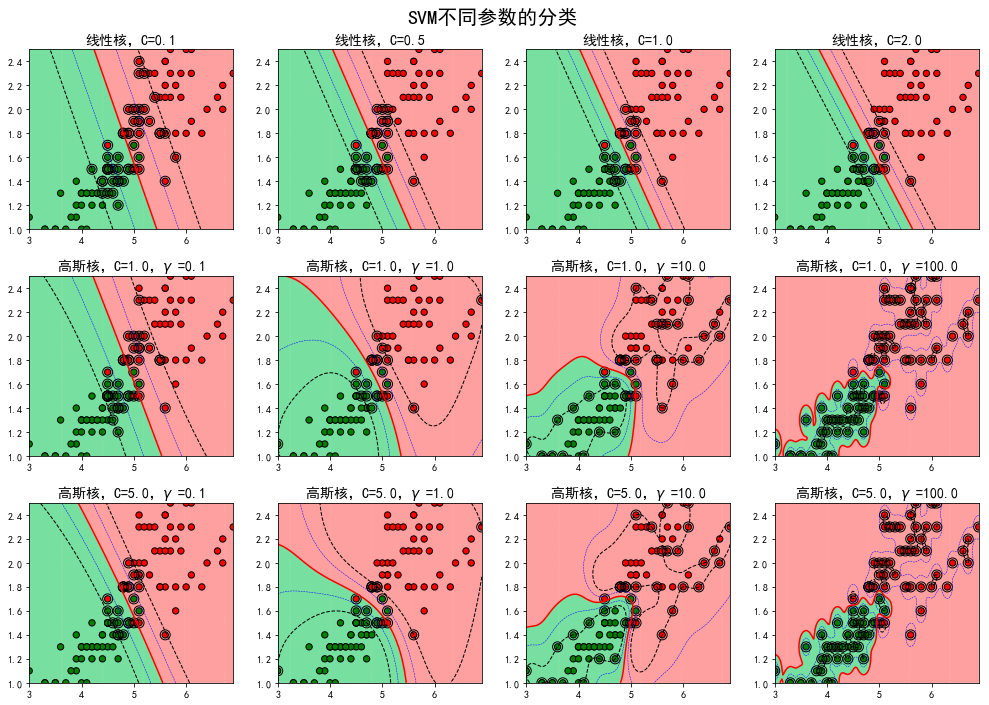

In [7]:
import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    # print '正确率：%.2f%%' % (100*float(acc.sum()) / a.size)

data = np.loadtxt('data/bipartition.txt', dtype=np.float, delimiter='\t')
x, y = np.split(data, (2, ), axis=1)
y = y.ravel()

# 分类器
clf_param = (('linear', 0.1), ('linear', 0.5), ('linear', 1), ('linear', 2),
             ('rbf', 1, 0.1), ('rbf', 1, 1), ('rbf', 1, 10), ('rbf', 1, 100),
             ('rbf', 5, 0.1), ('rbf', 5, 1), ('rbf', 5, 10), ('rbf', 5, 100))
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(14, 10), facecolor='w')
for i, param in enumerate(clf_param):
    clf = svm.SVC(C=param[1], kernel=param[0])
    if param[0] == 'rbf':
        clf.gamma = param[2]
        title = u'高斯核，C=%.1f，$\gamma$ =%.1f' % (param[1], param[2])
    else:
        title = u'线性核，C=%.1f' % param[1]

    clf.fit(x, y)
    y_hat = clf.predict(x)
    show_accuracy(y_hat, y)  # 准确率

    # 画图
    print(title)
    print('支撑向量的数目：', clf.n_support_)
    print('支撑向量的系数：', clf.dual_coef_)
    print('支撑向量：', clf.support_)
    plt.subplot(3, 4, i+1)
    grid_hat = clf.predict(grid_test)       # 预测分类值
    grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=40, cmap=cm_dark)      # 样本的显示
    plt.scatter(x[clf.support_, 0], x[clf.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')   # 支撑向量
    z = clf.decision_function(grid_test)
    # print 'z = \n', z
    print('clf.decision_function(x) = ', clf.decision_function(x))
    print('clf.predict(x) = ', clf.predict(x))
    z = z.reshape(x1.shape)
    plt.contour(x1, x2, z, colors=list('kbrbk'), linestyles=['--', '--', '-', '--', '--'],
                linewidths=[1, 0.5, 1.5, 0.5, 1], levels=[-1, -0.5, 0, 0.5, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(title, fontsize=14)
plt.suptitle(u'SVM不同参数的分类', fontsize=20)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.92)
plt.show()